In [28]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [42]:
import cv2 as cv 
import os 
from fastai.vision import *
from fastai.metrics import error_rate
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
# figure(num=None, figsize=(15, 15), dpi=100, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (20,4)

## EDA DeepfakeDetection Dataset
Fake videos are inside a directory called ***manipulated_sequences*** and original videos are inside a directory called ***original_sequences***

A total of 3069 fake videos have been created from 363 real videos

In [2]:
FAKES_PATH = '../data/manipulated_sequences/DeepFakeDetection/c23/videos/'
ORIGINALS_PATH = '../data/original_sequences/actors/c23/videos'

In [3]:
print(f'Number of fake videos: {len(os.listdir(FAKES_PATH))}')
print(f'Number of real videos: {len(os.listdir(ORIGINALS_PATH))}')

Number of fake videos: 3069
Number of real videos: 363


Find unique file extensions in dataset


In [4]:
def find_file_ext(file_path):
    """
    List all unique file extensions inside a file path.
    Arguments:
    file_path -- location of files whose extensions have to be listed
    Returns: 
    ext_list -- list of unique file types/extensions inside file_path
    """
    
    file_list = os.listdir(file_path)
    ext_list = []
    for file in file_list:
        try: 
            ext = file.split(".")[1]
            if ext not in ext_list:
                ext_list.append(ext)
        except: 
            print(f"This file does not have an extension: {file}")
    return ext_list

In [5]:
ext_list = find_file_ext(FAKES_PATH)
print(f'List of unique file extensions: {ext_list}')

This file does not have an extension: tmpz3bvv1w1
List of unique file extensions: ['mp4']


All but one file in the fake video folder are mp4. One file called tmpz3bvv1w1 does not have an extension. 

In [6]:
ext_list = find_file_ext(ORIGINALS_PATH)
print(f'List of unique file extensions: {ext_list}')

List of unique file extensions: ['mp4']


How many fake videos from each real video

fake vidoes are created using a source video and target video

There are common scenes in multiple videos

how many fakes from each scene? 

How many reals from each scene? 

How many real videos of each actor? 

The naming scheme for originial videos is ***actor number__scene name***

In [45]:
original_videos = os.listdir(ORIGINALS_PATH)
original_videos[0:10]

['04__talking_angry_couch.mp4',
 '11__podium_speech_happy.mp4',
 '15__podium_speech_happy.mp4',
 '07__kitchen_still.mp4',
 '03__meeting_serious.mp4',
 '01__talking_against_wall.mp4',
 '08__walking_outside_cafe_disgusted.mp4',
 '15__walking_outside_cafe_disgusted.mp4',
 '09__podium_speech_happy.mp4',
 '03__talking_against_wall.mp4']

The naming scheme of manipulated videos is ***target actor__source actor__sequence name__8 character long experiment id***

In [44]:
fake_videos = os.listdir(FAKES_PATH)
fake_videos[0:10]

['13_07__walking_down_street_outside_angry__RVQCPCJF.mp4',
 '27_15__outside_talking_pan_laughing__WZ4MLUAV.mp4',
 '02_25__walking_and_outside_surprised__Z7FQ69VP.mp4',
 '06_07__podium_speech_happy__NMGYPBXE.mp4',
 '20_09__podium_speech_happy__RAGUKRMK.mp4',
 '11_13__kitchen_pan__61T622EK.mp4',
 '03_11__kitchen_pan__P08VGHTA.mp4',
 '20_14__walk_down_hall_angry__B014BKVO.mp4',
 '26_06__outside_talking_still_laughing__L5BVR5L9.mp4',
 '14_21__walking_outside_cafe_disgusted__N0WM4GSV.mp4']

In [9]:
import re

def find_unique_scenes(file_path):
    """
    Finds unique scenes
    Arguments:
    file_path -- location of videos that were shot in different scenes
    Returns:
    scene_list -- list of unique scenes where videos were shot 
    """
    scene_list = []
    file_list = os.listdir(file_path)
    pat = re.compile('\d+_(\w+)')
    for file in file_list: 
        match = pat.match(file)
        scene = match.group(1)[1:]
        if scene not in scene_list:
            scene_list.append(scene)
    return scene_list

In [10]:
unique_scenes = find_unique_scenes(ORIGINALS_PATH)

In [19]:
dict_scenes = { i : 0 for i in unique_scenes }
def videos_from_a_scene(unique_scene_list, file_path):
    file_list = os.listdir(file_path)
    pat = re.compile('\d+_(\w+)')
    for file in file_list:
        match = pat.match(file)
        scene_name = match.group(1)[1:]
        dict_scenes[scene_name] += 1

In [20]:
videos_from_a_scene(unique_scenes, ORIGINALS_PATH)

In [21]:
dict_scenes

{'talking_angry_couch': 22,
 'podium_speech_happy': 28,
 'kitchen_still': 26,
 'meeting_serious': 4,
 'talking_against_wall': 27,
 'walking_outside_cafe_disgusted': 26,
 'walk_down_hall_angry': 28,
 'walking_down_indoor_hall_disgust': 15,
 'exit_phone_room': 28,
 'walking_down_street_outside_angry': 28,
 'outside_talking_pan_laughing': 28,
 'outside_talking_still_laughing': 27,
 'secret_conversation': 18,
 'kitchen_pan': 27,
 'hugging_happy': 16,
 'walking_and_outside_surprised': 15}

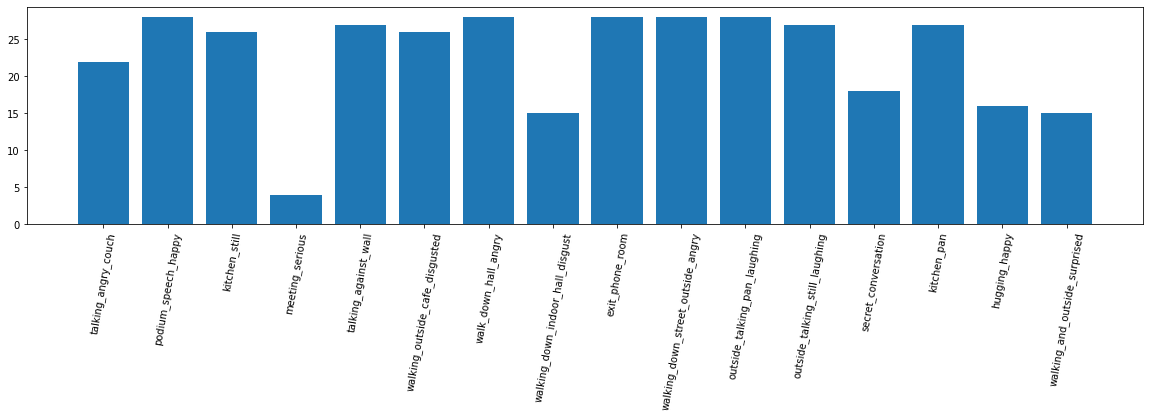

In [43]:
plt.bar(range(len(dict_scenes)), list(dict_scenes.values()), align='center')
plt.xticks(range(len(dict_scenes)), list(dict_scenes.keys()), rotation=80)
plt.show()

In [12]:
def find_unique_scenes_in_fakes(file_path):
    """
    Finds unique scenes
    Arguments:
    file_path -- location of videos that were shot in different scenes
    Returns:
    scene_list -- list of unique scenes where videos were shot 
    """
    
    file_list = os.listdir(file_path)
    scene_list = []
    for file in file_list: 
        pat = re.compile('\w{7}(\w+)')
        match = pat.match(file)        
        scene = match.group(1)
        if scene not in scene_list:
            scene_list.append(scene)
    return scene_list
        

In [13]:
unique_fake_scenes = find_unique_scenes_in_fakes(FAKES_PATH)

In [14]:
dict_scenes

{'talking_angry_couch': 0,
 'podium_speech_happy': 0,
 'kitchen_still': 0,
 'meeting_serious': 0,
 'talking_against_wall': 0,
 'walking_outside_cafe_disgusted': 0,
 'walk_down_hall_angry': 0,
 'walking_down_indoor_hall_disgust': 0,
 'exit_phone_room': 0,
 'walking_down_street_outside_angry': 0,
 'outside_talking_pan_laughing': 0,
 'outside_talking_still_laughing': 0,
 'secret_conversation': 0,
 'kitchen_pan': 0,
 'hugging_happy': 0,
 'walking_and_outside_surprised': 0}

## Q&D Model 

In [1]:
from fastai.vision import *

In [2]:
# ls ../data/manipulated_sequences/DeepFakeDetection/c23/images/

In [3]:
data_path = Path("../data/manipulated_sequences/DeepFakeDetection/c23/images/")

In [4]:
# np.random.seed(42)
data = ImageDataBunch.from_folder(data_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

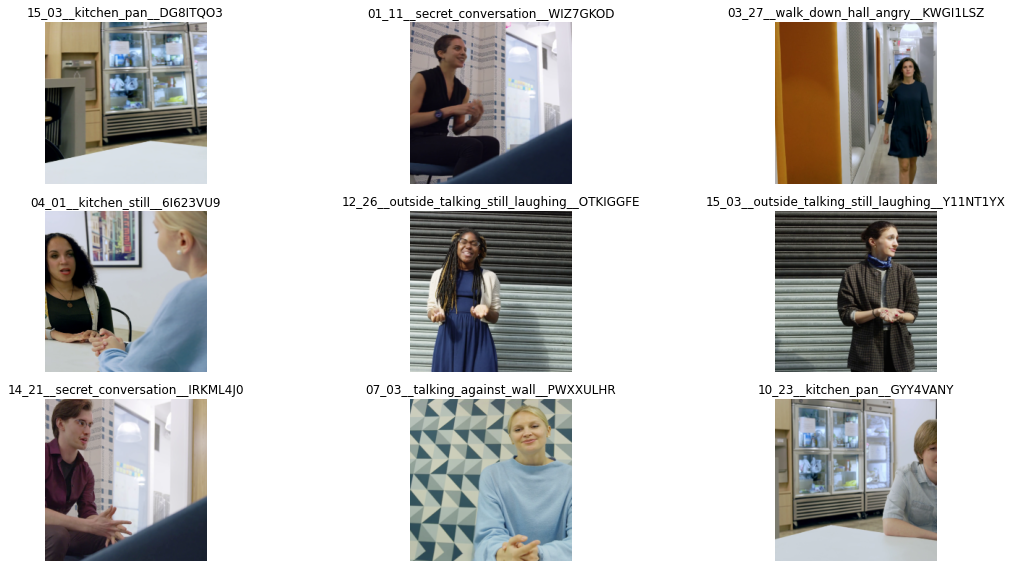

In [5]:
data.show_batch(rows=3, figsize=(15,8))

In [9]:
%%HTML
<video width="320" height="240" controls>
  <source src="../data/manipulated_sequences/DeepFakeDetection/c23/videos/01_03__talking_against_wall__JZUXXFRB" type="video/mp4">
</video>

In [2]:
path_grouped = Path("/home/jupyter/data/manually_grouped")

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path_grouped, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)


In [5]:
data.classes

['fakes', 'originals']

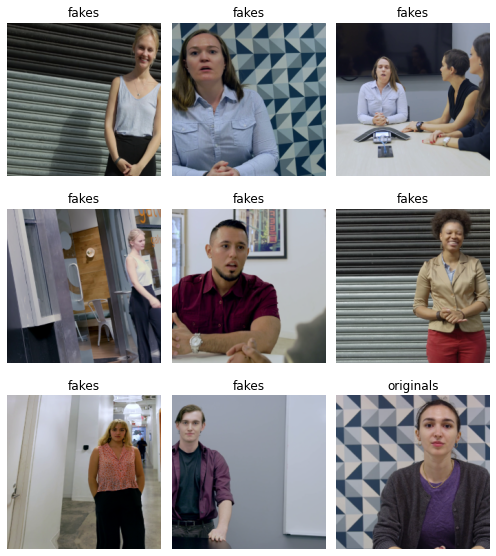

In [8]:
data.show_batch(rows=3, figsize=(7,8))

In [9]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['fakes', 'originals'], 2, 29341, 7335)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /home/jupyter/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [11]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time


OSError: Caught OSError in DataLoader worker process 2.
Original Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/PIL/ImageFile.py", line 233, in load
    s = read(self.decodermaxblock)
  File "/opt/conda/lib/python3.7/site-packages/PIL/PngImagePlugin.py", line 838, in load_read
    cid, pos, length = self.png.read()
  File "/opt/conda/lib/python3.7/site-packages/PIL/PngImagePlugin.py", line 129, in read
    length = i32(s)
  File "/opt/conda/lib/python3.7/site-packages/PIL/_binary.py", line 71, in i32be
    return unpack_from(">I", c, o)[0]
struct.error: unpack_from requires a buffer of at least 4 bytes

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/lib/python3.7/site-packages/fastai/data_block.py", line 655, in __getitem__
    if self.item is None: x,y = self.x[idxs],self.y[idxs]
  File "/opt/conda/lib/python3.7/site-packages/fastai/data_block.py", line 120, in __getitem__
    if isinstance(idxs, Integral): return self.get(idxs)
  File "/opt/conda/lib/python3.7/site-packages/fastai/vision/data.py", line 271, in get
    res = self.open(fn)
  File "/opt/conda/lib/python3.7/site-packages/fastai/vision/data.py", line 267, in open
    return open_image(fn, convert_mode=self.convert_mode, after_open=self.after_open)
  File "/opt/conda/lib/python3.7/site-packages/fastai/vision/image.py", line 398, in open_image
    x = PIL.Image.open(fn).convert(convert_mode)
  File "/opt/conda/lib/python3.7/site-packages/PIL/Image.py", line 901, in convert
    self.load()
  File "/opt/conda/lib/python3.7/site-packages/PIL/ImageFile.py", line 239, in load
    raise OSError("image file is truncated")
OSError: image file is truncated


In [12]:
learn.save('stage-1')


In [13]:
learn.unfreeze()

In [16]:
interp = ClassificationInterpretation.from_learner(learn)

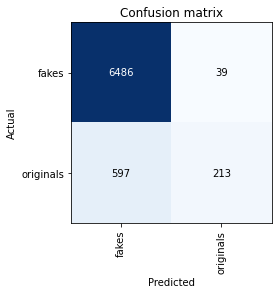

In [17]:
interp.plot_confusion_matrix()

In [15]:
help(get_image_files)

Help on function get_image_files in module fastai.vision.data:

get_image_files(c: Union[pathlib.Path, str], check_ext: bool = True, recurse=False) -> Collection[pathlib.Path]
    Return list of files in `c` that are images. `check_ext` will filter to `image_extensions`.



In [16]:
ImageDataBunch.from_name_re()

TypeError: from_name_re() missing 3 required positional arguments: 'path', 'fnames', and 'pat'

In [ ]:
get_image_files(ORIGINALS_PATH)